<center>
    <header>
        <h1>Campionamento e Ricostruzione</h1>
        <h2>Marco Bondaschi, Mauro Conte</h2>
        <h4>Laboratorio di Telecomunicazioni</h4>
        <h5>Università Degli Studi Di Brescia</h5>
        <h6>13/03/2017</h6>
    </header>
</center>
<hr><hr>

In [1]:
#Stili per la tabella delle operazioni sui segnali
from IPython.core.display import HTML
HTML("""
<style>
    .tcalc{ 
        width: 950px;    //fixed width, 950px layout large
        margin: 0 auto; //ceter table in body
    }
    
    .tcalc td, .tcalc th{
        text-align:center !important;
    }
    
    .timage {
        border: none !important;
    }
    .timage td, .timage tr  {
        border: none;
    }
    
    .oimg {
        width: 600px;
    }
     
</style>
""")

<h2>Descrizione</h2>

Per questa seconda esperienza di laboratorio abbiamo preso un segnale analogico di base, lo abbiamo campionato tramite un mantenitore e lo abbiamo ricostruito con un filtro digitale del quarto ordine. Lo scopo dell'esperienza è stato quello di valutare gli effetti di questi passaggi sul segnale ricostruito, comprese le modifiche che entrano in gioco utilizzando un oscilloscopio per visualizzare le forme d'onda.
In particolare, abbiamo valutato le differenze di effetti che questo procedimento causava su due diversi segnali:
<ul>
<li>$x\left(t\right)=sin\left(2\pi{f_0}t\right)$, con   $\ f_0=500\:Hz$</li>
<li>$y\left(t\right)=\left|\,sin\left(2\pi{f_0}t\right)\,\right|$, con   $\ f_0=500\:Hz$</li>
</ul>

<h2>Strumenti</h2>

Per raggiungere questi obiettivi abbiamo utilizzato i seguenti strumenti:
<ul>
<li>Oscilloscopio digitale <i>Agilent Technologies InfiniiVision MSO-X 3014A</i></li>
<li>Generatore di segnali analogico <i>HP 33120A</i></li>
<li>Filtro di ricostruzione digitale del IV ordine a capacità commutate</li>
<li>Microsoft Excel</li>
</ul>

<h2>Svolgimento</h2>

<h3>Analisi e interpolazione di ordine zero</h3>

Il primo segnale con cui abbiamo operato è $x\left(t\right)=sin\left(2\pi{f_0}t\right)$, con $\ f_0=500\:Hz$ la cui trasformata di Fourier calcolata da $-\infty$ a $\infty$ può essere facilmente ottenuta applicando prima la formula di Eulero e poi la proprietà di modulazione/traslazione della trasformata di Fourier.

$$ X\left(f\right) = \mathfrak{F}\left\{x\left(t\right)\right\}=\mathfrak{F}\left\{sin\left(2\pi{f_0}t\right)\right\} =  \mathfrak{F}\left\{\frac{1}{2j}e^{2\pi f_0t} - \frac{1}{2j}e^{-2\pi f_0t}\right\} = \frac{1}{2j}\delta{\left(f+f_0\right)}-\frac{1}{2j}\delta{\left(f-f_0\right)}$$.

In primo luogo abbiamo visualizzato sull'oscilloscopio il segnale ottenuto dal generatore di funzioni e ne abbiamo visualizzato lo spettro.

Lo spettro ottenuto non coincide con quello calcolato per vari motivi:
<ul>
    <li>l'oscilloscopio calcola la trasformata di Fourier sulla porzione positiva dello spettro</li>
    <li>l'oscilloscopio visualizza il modulo della trasformata</li>
    <li>l'oscilloscopio visualizza solo una porzione della sinusoide: la FFT calcolata risulta quindi essere quella di una sinusoide finestrata con un rettangolo e ripetuta periodicamente</li>
</ul>

Quindi, limitandoci alla porzione di spettro positivo e valutando il modulo otteniamo
$$ X\left(f\right) = \frac{1}{2}\delta{\left(f-f_0\right)} $$.
Il finestramento della sinusoide con un rettangolo nei tempi equivale ad una convoluzione tra lo spettro della sinusoide, una delta, e lo spettro della finestra rettangolare, un seno cardinale. Il risultato finale è dunque il modulo di un seno cardinale centrato nella frequenza $f_0$ della sinusoide.

<table class="timage"><tr><td><img src="res/sin.png" /></td><td><img src="res/fsin.png" /></td></tr></table>

Successivamente, utilizzando il generatore di funzioni abbiamo generato una sinusoide campionata e mantenuta con 8 campioni sul periodo, l'abbiamo visualizzata sull'oscilloscopio e ne abbiamo mostrato lo spettro.

Campionare un segnale a una certa frequenza equivale a moltiplicarlo nel tempo per un pettine di delta con periodo l'inverso della frequenza di campionamento, ed in frequenza ciò equivale a fare la convoluzione tra lo spettro del segnale e un pettine di delta il cui periodo è pari alla frequenza di campionamento. Lo spettro finale è perciò una funzione periodica di periodo la frequenza di campionamento.

Inoltre il generatore di funzioni effettua anche un mantenimento sui campioni: viene quindi introdotta un'ulteriore distorsione nello spettro. Mantenere un segnale per un certo periodo equivale nei tempi ad una convoluzione tra il segnale ed un rettangolo  che parte da zero e ha durata pari al tempo di mantenimento, pari in questo caso al periodo di campionamento.
Qesta operazione risulta essere quella più dannosa per lo spettro: infatti in frequenza questo equivale ad un prodotto dello spettro con un seno cardinale che modifica quindi le ampiezze delle delta.

<table class="timage"><tr><td><img src="res/sin8.png" /></td><td><img src="res/fsin8.png" /></td></tr></table>


Successivamente ci siamo occupati del secondo segnale $y\left(t\right)=\left|\,sin\left(2\pi{f_0}t\right)\,\right|$, con   $\ f_0=500\:Hz$.

Essendo questo un segnale periodico pari con discontinuità alla derivata prima il suo spettro ha supporto illimitato ed è una distribuzione che decesce come $\frac{1}{f^2}$, definito solo nei multipli della frequenza fondamentale.

Abbiamo generato una versione campionata e mantenuta del segnale utilizzando l'inserimento per punti del generatore di funzioni e lo abbiamo visualizzato insieme al suo spettro.

<table class="timage"><tr><td><img src="res/modsin8.png" /></td><td><img src="res/fmodsin8.png" /></td></tr></table>

Gli effetti sullo spettro del campionamento, mantenimento e visualizzazione sull'oscilloscopio sono gli stessi che intevengono nel caso della semplice sinusoide. 

Bisogna tenere conto che gli strumenti digitali quantizzano i segnali, introducento un errore. Questo errore è tanto piu grande quanto meno si sfrutta la dinamica dello strumento utilizzato. Abbiamo generare una sinusoide campionata e quantizzata con 16 campioni su un periodo e abbiamo misurato i valori generati. Abbiamo ripetuto il procedimento generando una sinusoide con ampiezza decimata rispetto la precedente e misurato i valori generati anche in questo caso.

Abbiamo valutato l'errore di quantizzazione nei due casi. 

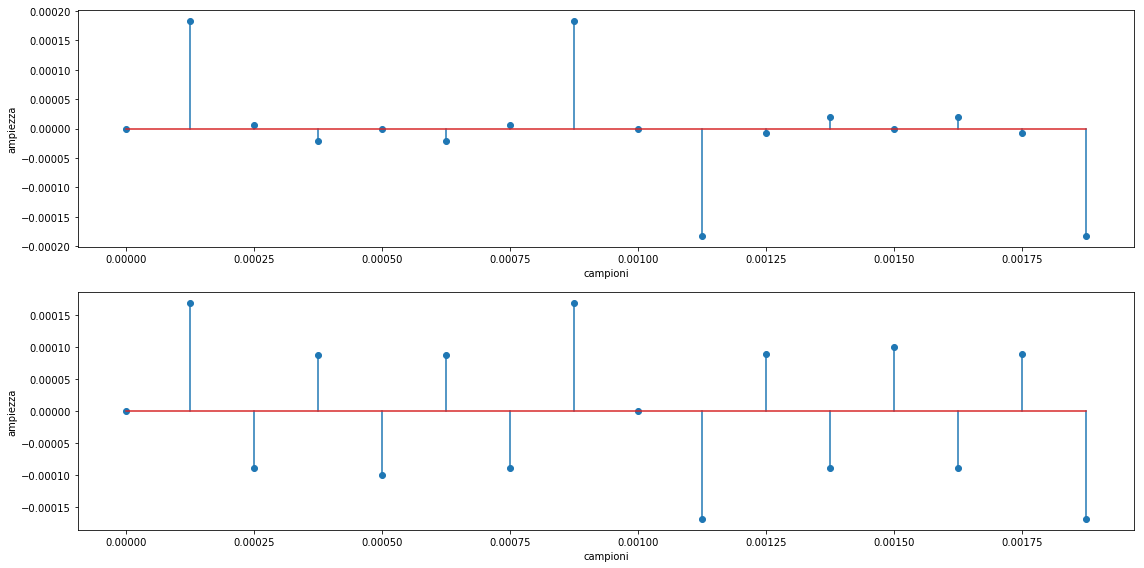

Enegia dell'errore caso 1:  0.000369390498783
Enegia dell'errore caso 2:  0.000442961028306
Sfruttando male la dinamica aumenta l'errore di quantizzazione


In [2]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0,0.002,17)
t = t[0:17-1]

s1 = np.sin(2*np.pi*500*t)
s1q = [0,0.3825,0.7071,0.9239,1,0.9239,0.7071,0.3825,0,-0.3825,-0.7071,-0.9239,-1,-0.9239,-0.7071,-0.3825]
s01 = s1/10
s01q = [0,0.0381,0.0708,0.0923,0.1001,0.0923,0.0708,0.0381,0,-0.0381,-0.0708,-0.0923,-0.1001,-0.0923,-0.0708,-0.0381]

err1 = s1-s1q
Eerr1 = np.linalg.norm(err1)
err01 = s01-s01q
Eerr01 = np.linalg.norm(err01)

fig = plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.stem(t,err1)
plt.xlabel("campioni")
plt.ylabel("ampiezza")
plt.subplot(2,1,2)
plt.stem(t,err01)
plt.xlabel("campioni")
plt.ylabel("ampiezza")
fig.tight_layout()
plt.show()

print("Enegia dell'errore caso 1: ",Eerr1)
print("Enegia dell'errore caso 2: ",Eerr01)
print("Sfruttando male la dinamica aumenta l'errore di quantizzazione")

Si può anche tracciare l'istogramma della distribuzione dell'errore nei due casi anche se non avendo troppi dati a disposizione non è molto significativo.

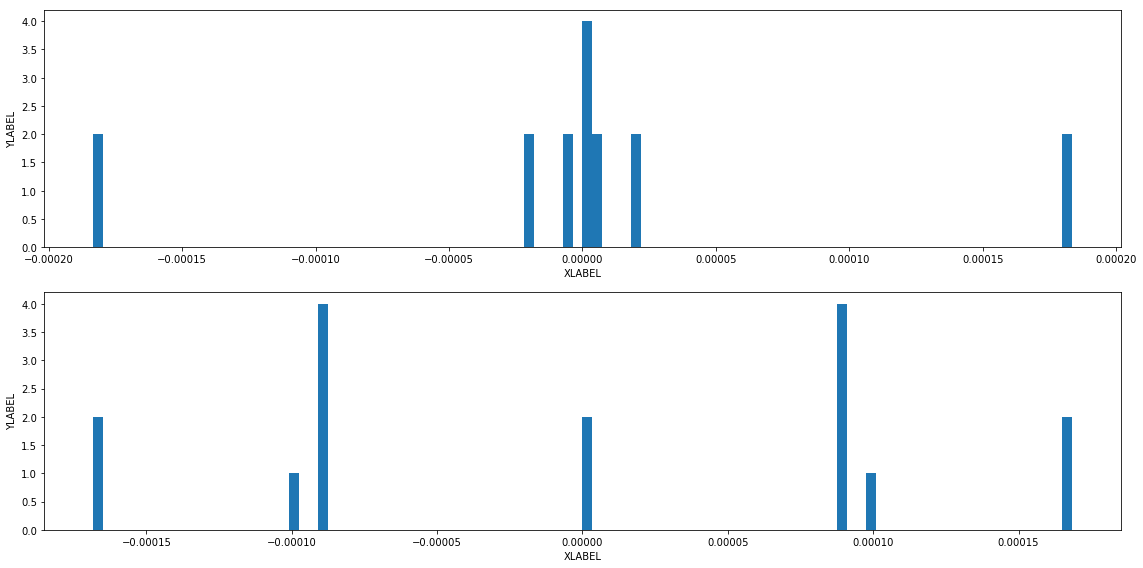

In [3]:
fig = plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.hist(err1,100)
plt.xlabel("XLABEL")
plt.ylabel("YLABEL")
plt.subplot(2,1,2)
plt.hist(err01,100)
plt.xlabel("XLABEL")
plt.ylabel("YLABEL")
fig.tight_layout()
plt.show()

### Simulazione quantizazzione dinamica fissa variando n.livelli, n.campioni e ampiezza dell'onda

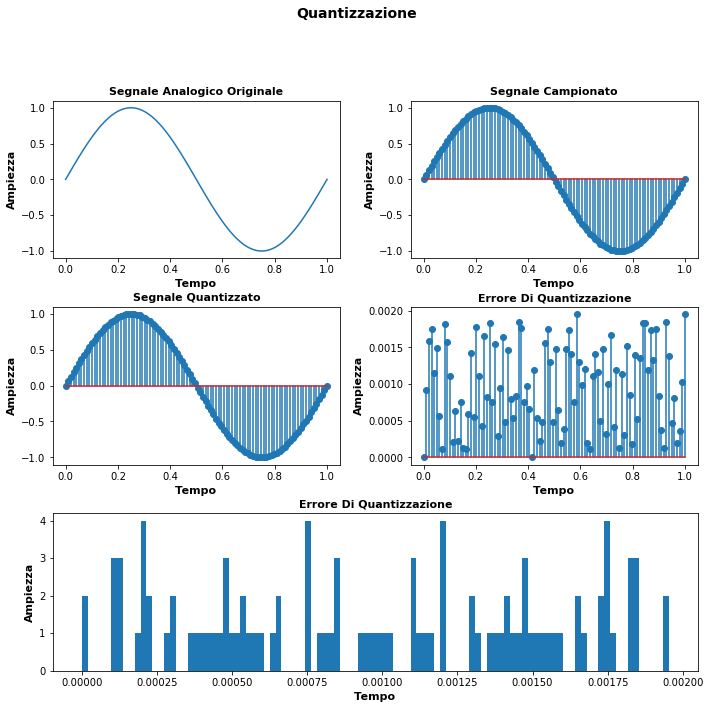

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ipywidgets as wdg


def lamagia(n_sample,amplitude,n_liv):

    dyn = { "min":-1, "max":1 }
    quanto = (dyn.get("max")-dyn.get("min"))/(int((n_liv)))

    t = np.linspace(0,1,101)
    n = np.linspace(0,1,n_sample)

    st = float(amplitude)*np.sin(2*np.pi*t)
    sn = float(amplitude)*np.sin(2*np.pi*n)
    snq = quanto*(sn//quanto)
    difference = sn-snq


    gs = gridspec.GridSpec(3, 2)
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Quantizzazione', fontsize=14, fontweight='bold')

    plt.subplot(gs[0,0])
    plt.plot(t,st)
    plt.title("Segnale Analogico Originale",fontsize=11, fontweight='bold')
    plt.xlabel("Tempo",fontsize=11, fontweight='bold')
    plt.ylabel("Ampiezza",fontsize=11, fontweight='bold')

    plt.subplot(gs[0,1])
    plt.stem(n,sn)
    plt.title("Segnale Campionato",fontsize=11, fontweight='bold')
    plt.xlabel("Tempo",fontsize=11, fontweight='bold')
    plt.ylabel("Ampiezza",fontsize=11, fontweight='bold')

    plt.subplot(gs[1,0])
    plt.stem(n,snq)
    plt.title("Segnale Quantizzato",fontsize=11, fontweight='bold')
    plt.xlabel("Tempo",fontsize=11, fontweight='bold')
    plt.ylabel("Ampiezza",fontsize=11, fontweight='bold')

    plt.subplot(gs[1,1])
    plt.stem(n,difference)
    plt.title("Errore Di Quantizzazione",fontsize=11, fontweight='bold')
    plt.xlabel("Tempo",fontsize=11, fontweight='bold')
    plt.ylabel("Ampiezza",fontsize=11, fontweight='bold')

    plt.subplot(gs[2,:])
    plt.hist(difference,100)
    plt.title("Errore Di Quantizzazione",fontsize=11, fontweight='bold')
    plt.xlabel("Tempo",fontsize=11, fontweight='bold')
    plt.ylabel("Ampiezza",fontsize=11, fontweight='bold')


    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    plt.show()
    
wdg.interact(lamagia, n_sample=(2,100,2), amplitude=[1e0,1e-1,1e-2,1e-3], n_liv=[1024,512,256,128,32,16,6,4,2])



<h3>Filtro di ricostruzione</h3>

Idealmente il filtro di ricostruzione ha uno spettro rettangolare centrato nell'origine di durata almeno la banda del segnale e al massimo metà della frequenza di campionamento, al fine di evitare di includere le repliche spettrali dovute al campionamento. In linea teorica il filtro dovrebbe anche "equalizzare" le ampiezze dello spettro eliminando gli effetti del seno cardinale dovuto al mantenimento.

Questo tipo di filtro è irrealizzabile nella pratica, poichè equivale ad avere come risposta all'impulso un seno cardinale, cioè un filtraggio infinito nei tempi. Inoltre intorno alla frequenza zero gli effetti di modulazione del seno cardinale dovuto al mantenimento risultano essere trascurabili e quindi il filtro che implementeremo ignorerà tale effetto.

In pratica abbiamo utilizzato un filtro digitale LP del quarto ordine a capacità commutate che abbiamo collegato tra il generatore di funzoni e l'oscilloscopio. Il modulo della risposta in frequenza risulta essere circa costante da 0 alla frequenza di taglio e poi decresce di 80 dB/dec.

Il filtro necessita di un ingresso di clock da cui è direttamente determinata la frequenza di taglio attraverso la formula  $f_t = \frac{f_{clock}}{50}$. Il clock in ingresso è un onda quadra fornita dal generatore di funzioni attraverso la sua uscita SYNC/TTL.

Per quanto riguarda il primo segnale la ricostruzione ottenuta è la seguente:

<img class="oimg" src="res/rsin8.png" />

Come si può vedere dall'immagine le repliche spettrali a frequenze maggiori dovute al campionamento sono state eliminate.

Essendo però il nostro filtro un semplice passa-basso, nel ricostruire il segnale non si è tenuto conto dell'effetto del mantenitore, che in frequenza "attenua" la delta a frequenza $\ f_0$ di un fattore pari a $sinc\left(\frac{1}{8}\right)=0.97$, un valore effettivamente trascurabile.

La possibilità di ricostruire esattamente questo primo segnale è dovuta alla sua caratteristica di avere una banda limitata: è quindi stato sufficiente rispettare il teorema di Shannon in fase di campionamento per poter ricostruire, in assenza di aliasing, il segnale originale. Questa possibilità ci è però preclusa per quanto concerne il secondo segnale, che possiede una banda infinita e quindi non rispetta le condizioni del teorema del campionamento. &Egrave; quindi prevedibile che la ricostruzione del segnale non sarà ottima: in particolare le alte frequenze, che entrano in gioco nei punti angolosi dovuti al modulo, verranno rimosse, causando nel segnale ricostruito uno smussamento nelle vicinanze dei punti sopra citati. La figura seguente mostra il risultato della nostra ricostruzione:

<img class="oimg" src="res/rmodsin8.png"/>

<h1>Le operazioni che intervengono e i loro effetti</h1>

<table class="tcalc">
    <tr>
        <th></th>
        <th>Nel Tempo</th>
        <th>In Frequenza</th>
    </tr>
    <tr>
        <th>Segnale</th>
        <td>$x\left(t\right)$</td>
        <td>$X\left(f\right)$</td>
    </tr>
    <tr>
        <th>Campionamento</th>
        <td>$x_c\left(t\right)=x\left(t\right)\delta_{T_C}\left(t\right)$</td>
        <td>$X_c\left(f\right)=X\left(f\right)*\frac{1}{T_C}\delta_{\frac{1}{T_C}}\left(f\right)$</td>
    </tr>
    <tr>
        <th>Mantenimento</th>
        <td>$x_m\left(t\right)=x_c\left(t\right)*rect\left(\frac{t-\frac{T_C}{2}}{T_C}\right)$</td>
        <td>$X_m\left(f\right)=X_c\left(f\right)T_Csinc\left(T_Cf\right)e^{-j\pi{T_C}{f}}$</td>
    </tr>
    <tr>
        <th>Finestramento</th>
        <td>$x_f\left(t\right)=x_m\left(t\right)rect\left(\frac{t}{w}\right)$</td>
        <td>$X_f\left(f\right)=X_m\left(f\right)*wsinc\left(wf\right)$</td>
    </tr>
</table>

Proprietà di convoluzione con un $\delta_T\left(\tau\right)$:

$\psi\left(\tau\right)*\sum\limits^{\infty}_{k=-\infty}{\delta\left(\tau-\frac{k}{\tau_c}\right)}= \sum\limits^{\infty}_{k=-\infty}{ \psi\left(\tau-\frac{k}{\tau_c}\right)}$

Sviluppando un po di conti:

$X_f\left(f\right) = X_m\left(f\right)*wsinc\left(wf\right) = $

$\quad\quad\; =\left[X_c\left(f\right)T_Csinc\left(T_Cf\right)e^{-j\pi{T_C}f}\right]*wsinc\left(wf\right) = $

$\quad\quad\; =\left\{\left[X\left(f\right)*\frac{1}{T_C}\delta_{\frac{1}{T_C}}\left(f\right)\right]T_Csinc\left(T_Cf\right)e^{-j2pif}\right\}*wsinc\left(wf\right) = $

$\quad\quad\; =\frac{1}{T_C}T_Cw\left\{sinc\left(T_Cf\right)e^{-j\pi{T_C}f}\left[X\left(f\right)*\delta_{\frac{1}{T_C}}\left(f\right)\right]\right\}*sinc\left(wf\right) = $

$\quad\quad\; =w\left\{ sinc\left(T_Cf\right)e^{-j\pi{T_C}f}\sum\limits^{\infty}_{k=-\infty}{ X\left(f-\frac{k}{T_C}\right)}\right\}*sinc\left(wf\right)$

Con il seguente segnale:

$x\left(t\right)=sin\left(2\pi{f_0}t\right)$

$X\left(f\right)=\frac{j}{2}\left[\delta\left(f+f_0\right)-\delta\left(f-f_0\right)\right]$

Lavorando solo sulla porzione positiva dello spettro:

$-\frac{j}{2}\left\{ \sum\limits^{\infty}_{k=-\infty}{\delta\left(f-f_0-\frac{k}{T_C}\right)}sinc\left(T_Cf\right)e^{-j\pi{T_C}f}\right\}*sinc\left(wf\right) = -\frac{j}{2}sinc\left(T_Cf\right)e^{-j\pi{T_C}f}\sum\limits^{\infty}_{k=-\infty}{sinc\left(w\left(f-f_0-\frac{k}{T_C}\right)\right)} $

<h2>Conclusioni</h2>

Il campionamento su segnali a banda limitata permette una perfetta ricostruzione del segnale originale. Nel caso di filtro non ideale la ricostruzione non è perfetta poichè le repliche non vengono completamente annullate. Questo effetto risulta però trascurabile in funzione dell'ordine del filtro usato. Nel nostro caso la prima replica spettrale si trova circa una decade dopo la frequenza del segnale, e quindi si ripresenta nel segnale ricostruito attenuata di un fattore pari a 80dB.

Il mantenimento introduce in generale una distorsione di ampiezza sullo spettro del segnale. Nel caso di una sinusoide, il cui spettro è una singola delta, questo equivale in un semplice riscalamento della forma d'onda. In più nel nostro caso specifico, questa attenuazione risulta trascurabile.

Sui segnali ricostruiti si può anche osservare un ripple a una frequenza non presente negli originali: questo fenomeno è dovuto al funzionamento del filtro di ricostruzione che necessita di un clock ad alta frequenza rispetto a quella dei segnali da ricostruire.

In tutti i calcoli svolti è stato trascurato il campionamento che l'oscilloscopio effettua sul segnale, che essendo a tempi molto brevi crea repliche a frequenze molto alte, che non risultano visibili nella FFT calcolata dall'oscilloscopio. 

Inoltre è stato trascurato l'effetto della quantizzazione operata automaticamente dal generatore di funzioni. Questo è stato possibile poichè abbiamo generato forme d'onda ad ampiezze piuttosto elevate. Se avessimo scelto di campionare e mantenere una sinusoide ad ampiezza molto inferiore, gli effetti della quantizzazione sui valori della sinusoide mantenuta sarebbero stati molto più evidenti, causando ulteriore "rumore" nella ricostruzione del segnale di partenza.